# PC5228 Assignment

We used the IBMQ platform to run a Mach-Zehnder interferometer-like experiment using Quantum Computers. We pass a qubit through a Hadamard gate (beamsplitter), a phase gate (phase shifter), and another Hadamard gate. We then analyse the resulting interference pattern.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## Simulation

First, we run using a simulator to verify that our code actually works and thus gives us the desired interference pattern.

In [2]:
# Get the simulator
simulator = Aer.get_backend('qasm_simulator')

# Variables for later use
counts_0 = []
counts_1 = []
steps = 100
phases = np.linspace(0, 6*np.pi, num=steps)

for phase in phases:
    # Construct the Mach-Zehnder interferometer
    mzint = QuantumCircuit(1,1)
    mzint.h([0])
    mzint.p(phase, 0)
    mzint.h([0])
    mzint.measure(0, 0)
    
    # Run it on the simulator
    job = execute(mzint, simulator, shots=1024)
    result = job.result()

    counts = result.get_counts(mzint)
    
    try:
        counts_0.append(counts['0'])
    except KeyError:
        counts_0.append(0)
        
    try:
        counts_1.append(counts['1'])
    except KeyError:
        counts_1.append(0)

After collecting the data, let us plot the graph.

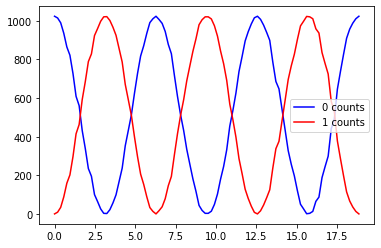

In [3]:
plt.plot(phases, counts_0, 'b', label='0 counts')
plt.plot(phases, counts_1, 'r', label='1 counts')
plt.legend(loc='best')
plt.show()

As it is indeed correct (up to some small distortions due to the finite sample size), we proceed to run the code on an Quantum Computer.

# Quantum Computer

First, let us find the least busy machine on the system.

In [4]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider(hub='ibm-q')
machines = provider.backends(simulator=False, operational=True)
backend = least_busy(machines)
backend

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

Now, we will run the same piece of code. Note that it will take some time as the loop runs for 100 steps and there are only so many machines available (which means long queues).

In [5]:
# Variables for later use
counts_0 = []
counts_1 = []
steps = 100
phases = np.linspace(0, 6*np.pi, num=steps)

for phase in phases:
    # Construct the Mach-Zehnder interferometer
    mzint = QuantumCircuit(1,1)
    mzint.h([0])
    mzint.p(phase, 0)
    mzint.h([0])
    mzint.measure(0, 0)
    
    # Run the code to a Quantum Computer
    transpiled = transpile(mzint, backend=backend)
    job = backend.run(transpiled)
    result = job.result()

    counts = result.get_counts(mzint)
    
    try:
        counts_0.append(counts['0'])
    except KeyError:
        counts_0.append(0)
        
    try:
        counts_1.append(counts['1'])
    except KeyError:
        counts_1.append(0)

We then save the resulting counts for analysis later. We also plot the result to do a sanity check.

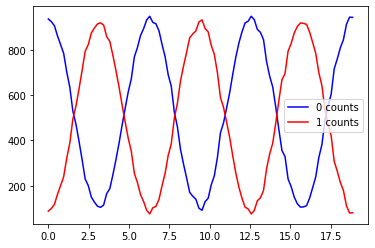

In [6]:
np.savetxt('counts_0.txt', counts_0)
np.savetxt('counts_1.txt', counts_1)

plt.plot(phases, counts_0, 'b', label='0 counts')
plt.plot(phases, counts_1, 'r', label='1 counts')
plt.legend(loc='best')
plt.show()

The plots seem good, so we will move on into the actual analysis, which I will do in a different file. The analysis will be done in `PC5228_analysis.ipynb`.

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.3
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.1
qiskit-nature,0.2.1
qiskit-finance,0.2.1
qiskit-optimization,0.2.3
qiskit-machine-learning,0.2.1
